# Detect Credit Card Frauds

Implements 1 supervised and 2 unsupervised machine-learning models for Credit Card Fraud Detection.

Last modification on 2019 Jan.9
By Edwin Campos, ecampos.phd@gmail.com

Dataset Reference: https://www.kaggle.com/mlg-ulb/creditcardfraud

Methods Reference: https://engmrk.com/module-19-credit-card-fraud-detection/?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com

In [1]:
# import dependencies (external libraries)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load input dataset

In [2]:
# Load the dataset from the csv file using pandas
# It contains transactions made by credit cards in 2 days of September 2013 by european cardholders.
data = pd.read_csv('../data/creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Note that... 

‘Time’ contains the seconds elapsed between each transaction and the first transaction in the dataset. 

‘Amount’ is the Transaction Amount, in Euros. 

‘Class’ is the target variable, 1 in case of fraud and 0 otherwise.

## Explore dataset (EDA: Exploratory Data Analysis)

In [3]:
# Note that the classes are unbalanced
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
fraud2valid_ratio = len(fraud) / float(len(valid))
print('The fraud-to-valid ratio is %f' % fraud2valid_ratio)
print('Fraud cases: {}'.format(len(fraud)))
print('Valid cases: {}'.format(len(valid)))

The fraud-to-valid ratio is 0.001730
Fraud cases: 492
Valid cases: 284315


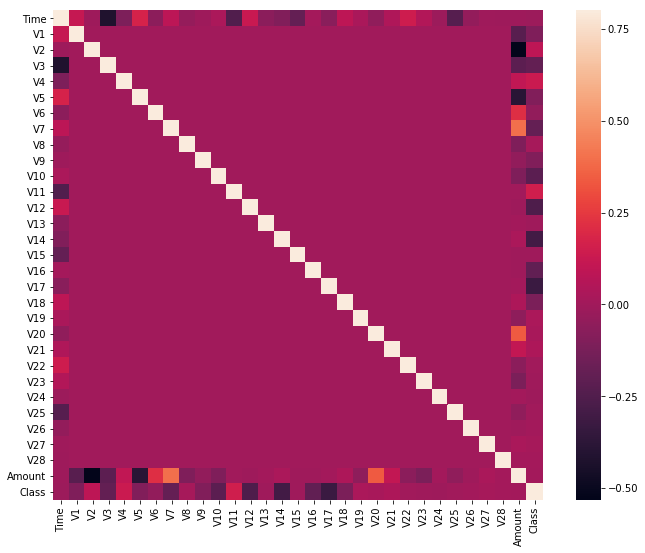

In [4]:
# Compute and visualize covariance (correlation) matrix to determine if we need to do any feature engineering
correl_matrix = data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(correl_matrix, vmax=0.8, square=True)
plt.show()

Note from the heatmap figure above that correlation coefficients for Class row are near zero for columns Time, V19 to V28, and Amount. Thus we can expect our model to focus on V1 to V18 features.

Note also that the correlation among the V-features are near zero (these are near orthogonal), which means that we don't need to eliminate any of these V-features before hand.

###  Separate features and target (ground truth, labels)

In [5]:
# Only use the 'Amount' and 'V1', ..., 'V28' features
features = ['V%d' % number for number in range(1, len(data.columns)-2)] + ['Amount']
# The above ignores the 1st (Time) and last (Class) columns.

# The target variable which we would like to predict, is the 'Class' variable
target = 'Class'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = data[features]
y = data[target]


### Are the data Gaussian-ly distributed? 

If so, we can build an efficient Anomaly Detection algorithm using... 
    
    1. the product of the Gaussian (Normal) distributions from each feature (if the covariance matrix is diagonal); or  
    2. the Multivariate Gaussian (Normal) distribution (if we need to capture correlations between features, and we have lots of computing resources).
    
If not, then we can still apply a feature transformation (e.g., log-transform: x-new = log(x + constant))


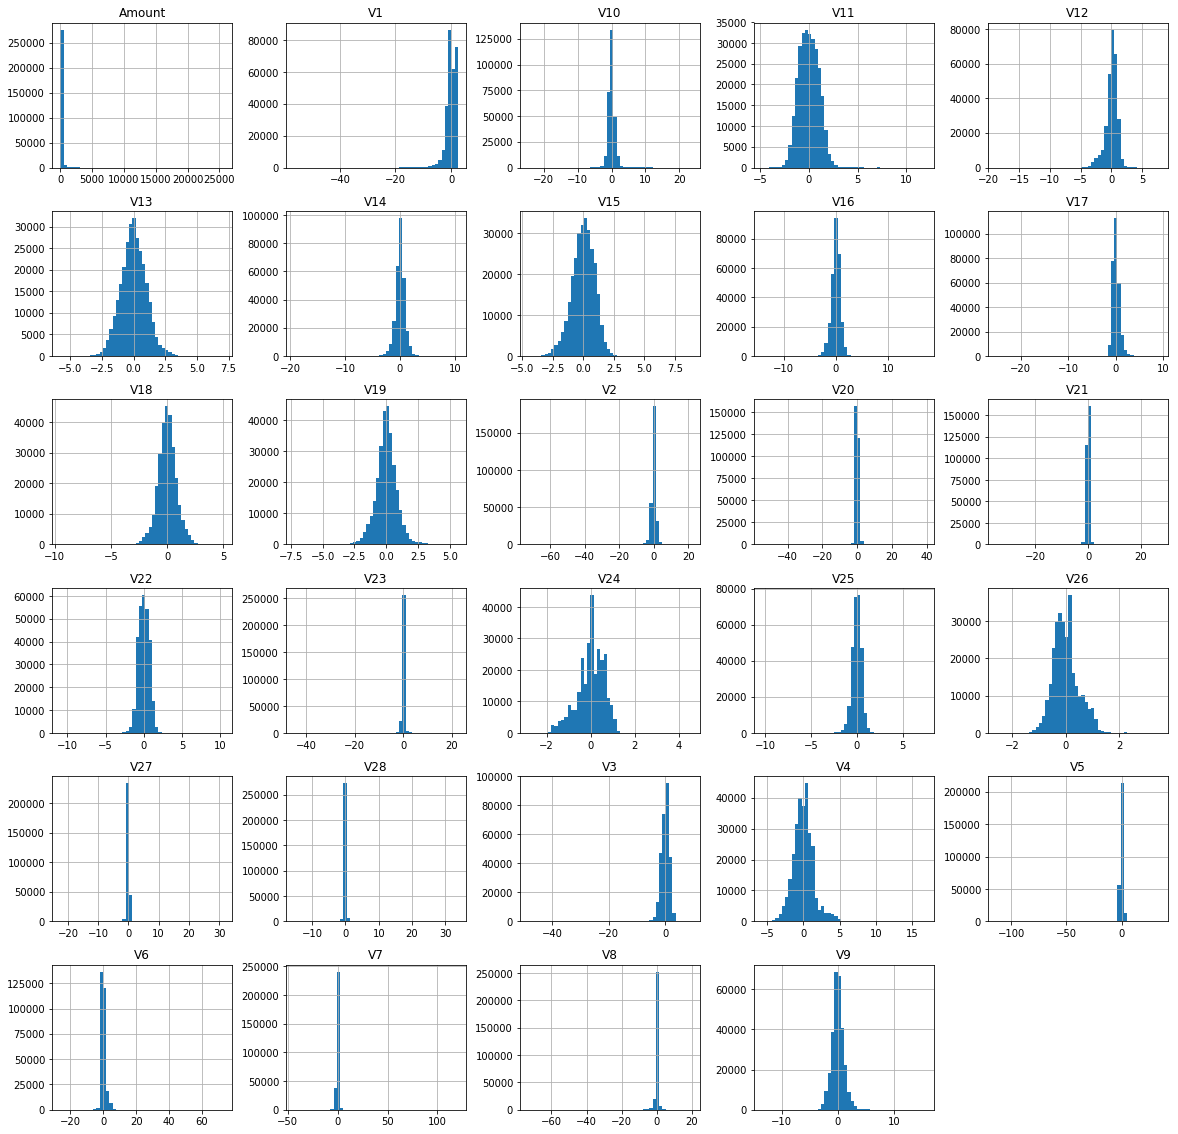

In [6]:

# Plot histograms of each parameter: limit to 4 subplots instead of the '29'
X.hist(bins=50, figsize = (20, 20))
plt.show()


### Normalize/Standardize the features: normally distributed around zero

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)


StandardScaler(copy=True, with_mean=True, with_std=True)

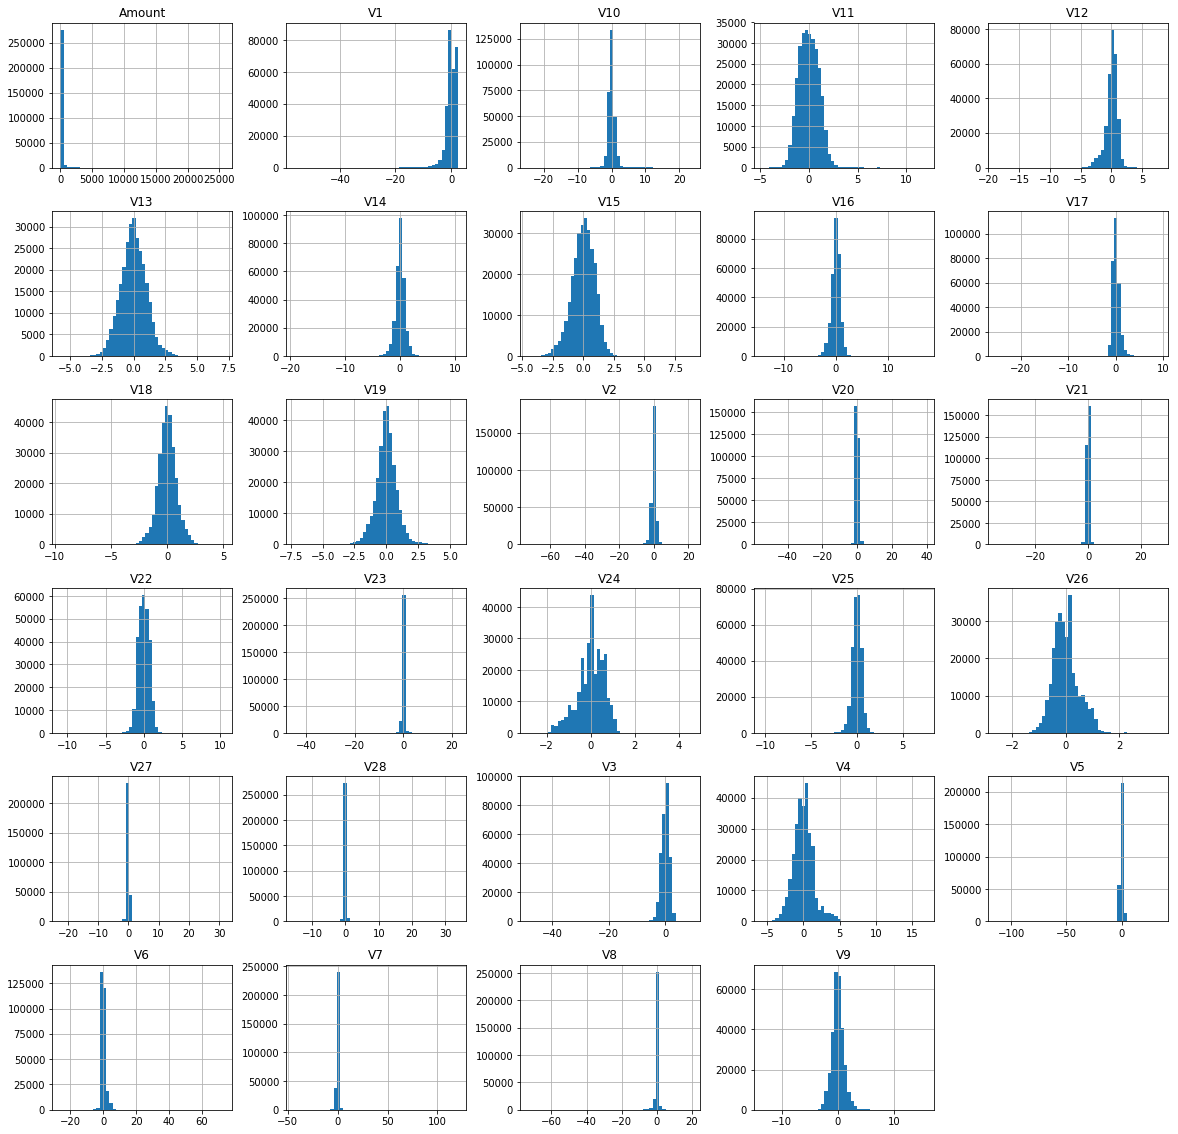

In [8]:
# Plot histograms of each parameter 
X.hist(bins=50, figsize = (20, 20))
plt.show()

### Split data into training and test (verification)

In [9]:
#Split the data set using 'train_test_split' function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


## Train a Supervised Machine-Learning Classification Model

In [10]:
# Instantiate the model to an empty object
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train the model using 'fit' method on the train dataset
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Verify the Supervised Machine-Learning Classification Model

In [11]:
# Verify the model using 'predict' method on the test dataset
y_pred = model.predict(X_test)


In [12]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix

#labels = [0, 1]  # ‘Class’ is the target variable, 1 in case of fraud and 0 otherwise.
conf_matrx = confusion_matrix(y_test, y_pred)# , labels)
print(conf_matrx)

fp = conf_matrx[0,1]
fn = conf_matrx[1,0]
tp = conf_matrx[1,1]
tn = conf_matrx[0,0]
print(tn,fp,fn,tp)

true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test, y_pred).ravel()
print(true_negatives, false_positives, false_negatives, true_positives)

[[56853     6]
 [   38    65]]
56853 6 38 65
56853 6 38 65


In [13]:
# Print the classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56859
          1       0.92      0.63      0.75       103

avg / total       1.00      1.00      1.00     56962



The 0 class (transactions without fraud) is predicted with 100% precision and recall 

The 1 class (transactions which are fraudulent) has more than 92% precision.
This means that 8% of the transactions which are fraudulent remain undetected by this model. 

f1-score = 2 x (precision x recall) / (precision + recall)

precision = true_positives / (true_positives + false_positives) 
          
          = true_positives / total_predicted_positives
                  
          = hits/(hits + false_alarms)

recall = true_positives / (true_positives + false_negatives) 

       = hits/(hits + misses) 

       = probability_of_detection


See page 17 in https://www.wmo.int/pages/prog/arep/wwrp/new/documents/WWRP2009-1_web_CD.pdf 

accuracy = (true_positives + true_negatives) / sample_size

https://en.wikipedia.org/wiki/Precision_and_recall

## Train two Unsupervised Anomaly-Detection Models

Reference: https://www.youtube.com/watch?v=gCWBFyFTxVU

In [14]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest  # Based on random forest algorithm
from sklearn.neighbors import LocalOutlierFactor  # Based on K-nearest neighbors algorithm  . See slides 43-45 in https://cse.buffalo.edu/~jing/cse601/fa12/materials/outlier_detection.pdf 

# Define the outliyer detection methods
classifiers = {
    "Isolation Forest": IsolationForest(max_samples= len(X),
                                       contamination = fraud2valid_ratio,
                                       random_state = 1), # 1 : true, 0 : false. When random_state set to 1, we are stating to pick the rows randomly to avoid any bias 
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors = 20,  # This hyperparameter could be tunned
    contamination = fraud2valid_ratio)
}

In [15]:
# Fit the models
n_outliers = len(fraud)

for i,(clf_name,clf) in enumerate(classifiers.items()):
    # Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:  # "Isolation Forest"
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Relabel the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != y).sum()
    
    # Print classification metrics
    print('{}: {} errors'.format(clf_name,n_errors))
    print('accuracy of {}'.format( accuracy_score(y,y_pred) ))
    print(classification_report(y,y_pred))

Isolation Forest: 689 errors
accuracy of 0.9975808178872008
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.30      0.30      0.30       492

avg / total       1.00      1.00      1.00    284807

Local Outlier Factor: 985 errors
accuracy of 0.9965415175891043
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.00      0.00      0.00       492

avg / total       1.00      1.00      1.00    284807



The above metrics indicate that the accurracy is high (> 99%) for both cases. This is only because the classes were unbalanced (much more Class = 0 cases). 

More important metrics for this case are the # of errors and the recall.

For **Isolation Forest**, note that the recall is only 0.3 for row = 1 (corresponding to Class = 1). That means that we will have to involve a human 30% of the time to confirm if these cases were actually fraud.

For **Local Outlier Factor**, note tha the precision and recall is zero for Class = 1, which means that model predicted everything to be in the other class (i.e., Class = 0).

There is a blog article discussing how to handle this imbalanced dataset, which is available at...

https://towardsdatascience.com/detecting-financial-fraud-using-machine-learning-three-ways-of-winning-the-war-against-imbalanced-a03f8815cce9

### For a **Tutorial** on how to deploy a Gradient Boosting model in an API endpoint for Fraud Detection, 
see https://www.kdnuggets.com/2018/08/introduction-fraud-detection-systems.html

### For an Online Course on Fraud Detection with Machine Learning
see https://www.datacamp.com/courses/fraud-detection-in-python
